# Exercise 5 - Feature extraction

## Load data

Load the file `E05_signal.csv` and define the strategy for a threshold-based spike detection

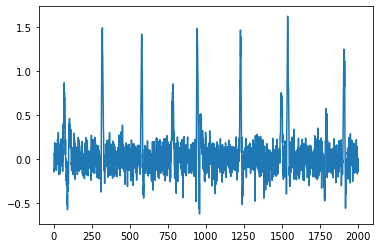

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('../signals/E05_signal.csv').values.flatten()

plt.figure()
plt.plot(data[10000:12000])
plt.show()

In [55]:
from scipy.signal import find_peaks

ths = 0.4
refractory = 0.003
fs = 1e4

## Detect the spikes

Detect the spikes with a threshold-based approach, visualize the results and have a first guess of the number of firing neurons

In [56]:
pk_loc = find_peaks(np.abs(data), height=ths, distance=refractory*fs)[0]
print(f'{len(pk_loc)} peaks found.')

1124 peaks found.


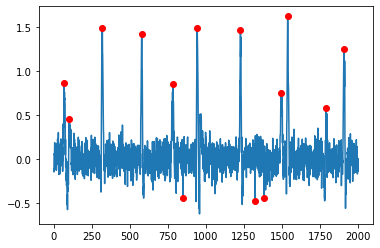

In [57]:
pk_loc_to_plot = pk_loc[(pk_loc>10000) & (pk_loc<12000)]
plt.figure()
plt.plot(data[10000:12000])
plt.plot(pk_loc_to_plot-10000, data[pk_loc_to_plot], 'ro')
plt.show()

## Define feature extraction functions

### Define a function for each of the features that you want to extract

In [58]:
def peak2peak(shape_in):
    return np.ptp(shape_in)
def pos_peak(shape_in):
    return(np.max(shape_in))
def neg_peak(shape_in):
    return np.abs(np.min(shape_in))
def energy(shape_in):
    return np.sqrt(np.sum(shape_in**2))

def extract_features(shape_in, function_list):
    
    feat_out = [f(shape_in) for f in function_list]

    return np.asarray(feat_out)

feature_list = [peak2peak, pos_peak, neg_peak, energy]

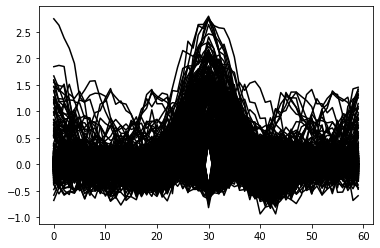

In [59]:
spikes = []
for i in pk_loc:
    spikes.append(data[int(i-refractory*fs):int(i+refractory*fs)])

spikes = np.asarray(spikes).squeeze().transpose()

plt.figure()
plt.plot(spikes,'k')
plt.show()

In [61]:
features = []
for s in range(spikes.shape[1]):
    features.append(extract_features(spikes[:,s], feature_list))
features=np.asarray(features)
print(features.shape)

(1124, 4)


# Determine the number of neurons

## Plot different combination of features to determine the number of firing neurons

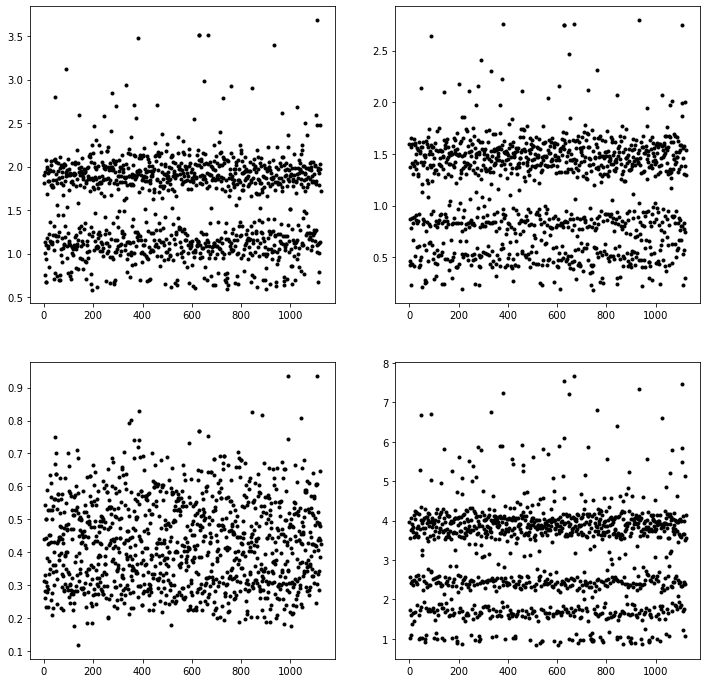

In [63]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
for i in range(4):
    row = int(i/2)
    col = int(i%2)
    ax[row,col].plot(features[:,i], 'k.')
plt.show(fig)

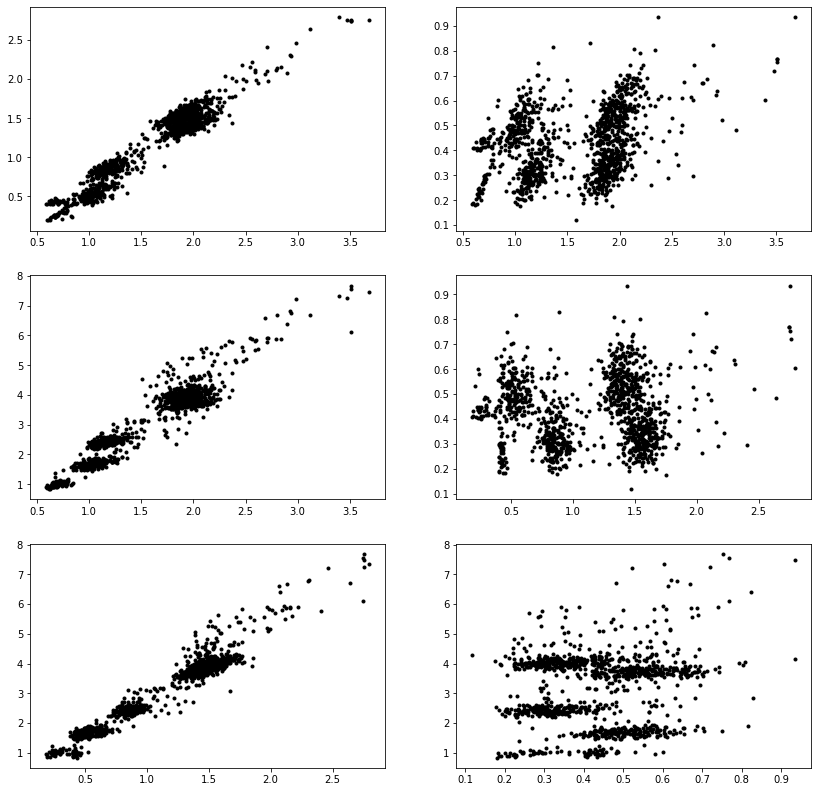

In [69]:
import itertools
from scipy.special import comb

n_plots = int(comb(features.shape[1],2))

fig, ax = plt.subplots(int(np.ceil(n_plots/2)),2,figsize=(14,14))

for i,c in enumerate(itertools.combinations(range(features.shape[1]),2)):
    row = int(i/2)
    col = int(i%2)
    ax[row,col].plot(features[:,c[0]], features[:,c[1]], 'k.')

plt.show()

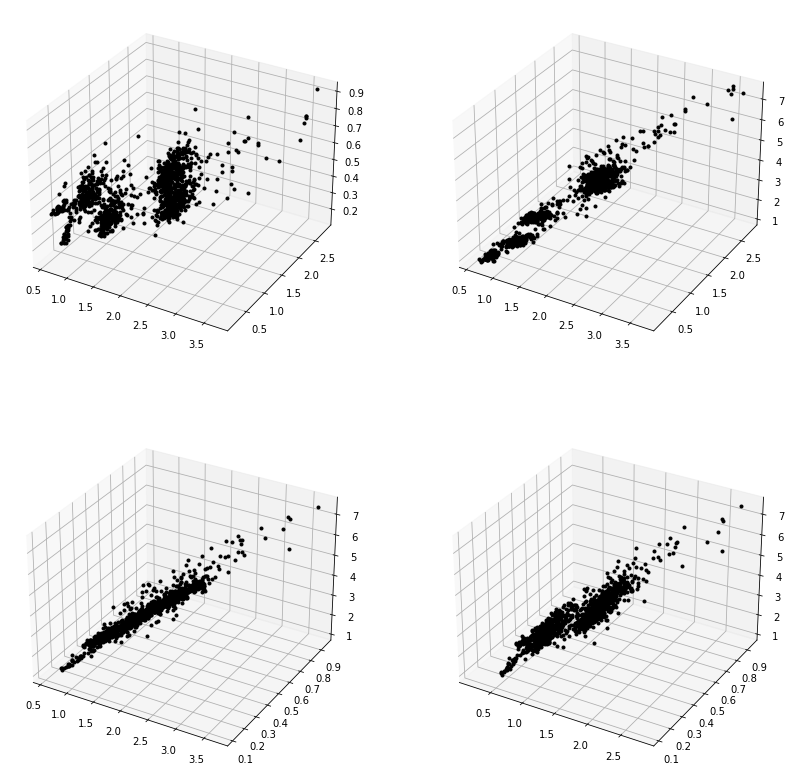

In [ ]:
n_plots = int(comb(features.shape[1],3))

fig = plt.figure(figsize=(14,14))
n_rows = int(np.ceil(n_plots/2))
n_cols = 2

for i,c in enumerate(itertools.combinations(range(features.shape[1]),3)):
    ax = fig.add_subplot(n_rows, n_cols, i+1, projection='3d')
    ax.plot(features[:,c[0]], features[:,c[1]], features[:,c[2]], 'k.')

plt.show()